In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

from preprocess import *
from train_model import *

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset into a pandas dataframe:

You can download this dataset from here: https://www.kaggle.com/nzalake52/new-york-times-articles

To rerun the code in this project save the dataset to a "data/" folder in the directory of this notebook. 

In [2]:
with open('./data/nytimes_news_articles.txt') as f:
    document = f.readlines()

articles = []
current_doc = []

for line in document:
    if "URL: htt" not in line:
        current_doc.append(line)
    if line == "\n":
        if len(current_doc) != 1:
            articles.append(" ".join(current_doc))
        current_doc = []
        
# Let's create a pandas dataframe        
dataset = pd.DataFrame({'text': articles})

# Print top 5
dataset.head(5)

,text
0,WASHINGTON — Stellar pitching kept the Mets af...
1,Mayor Bill de Blasio’s counsel and chief legal...
2,In the early morning hours of Labor Day last y...
3,It was the Apple Store in New York City before...
4,OMAHA — The United States Olympic swimming tri...


# Running our initial preprocessing

This may take a while.

In [3]:
dataset['processed'] = [preprocess(x) for x in dataset['text'].values]

# Selecting vocabulary size
Remember that larger vocabularies result in a longer training process.

In [4]:
# Let's see our current processed texts.
dataset.head(5)

,text,processed
0,WASHINGTON — Stellar pitching kept the Mets af...,"[washington, stellar, pitch, kept, met, afloat..."
1,Mayor Bill de Blasio’s counsel and chief legal...,"[mayor, bill, de, blasio, counsel, chief, lega..."
2,In the early morning hours of Labor Day last y...,"[earli, morn, hour, labor, day, last, year, gr..."
3,It was the Apple Store in New York City before...,"[appl, store, new, york, citi, thing, appl, st..."
4,OMAHA — The United States Olympic swimming tri...,"[omaha, unit, state, olymp, swim, trial, spect..."


We need to reduce the vocabulary used in our model to a computationally efficient size so let's study the words and find a good vocabulary size.

In [5]:
# Let's choose a top k words to select from:
k = 30000
top_k_words = select_top_k(dataset, k)

Least common words of top 30000
[('trough', 4), ('coomb', 4), ('edmundscom', 4), ('cancercaus', 4), ('bivalv', 4), ('115th', 4), ('shaqiri', 4), ('poprock', 4), ('astley', 4), ('dorki', 4)]


Once you find a value you like, do the final processing:

In [6]:
dataset['processed'] = keep_top_k_words(dataset, k)

# Training our Model

Our train_lda function takes a pandas dataframe with the processed texts in a 'processed' column, a number of topics to train, and a model name to save model files in a model folder for later use.

In [7]:
import warnings; warnings.simplefilter('ignore') # Ignoring divide by 0 in log runtime warning during training.

In [8]:
dictionary = gensim.corpora.Dictionary.load(r'./models/15topics/15topics.dict')
corpus = gensim.corpora.MmCorpus(r'./models/15topics/15topics.mm')
lda = gensim.models.ldamodel.LdaModel.load(r'./models/15topics/15topics.model')

In [9]:
dictionary,corpus,lda = train_lda(dataset, 50, '50topics')

Training model...
Time to train LDA model on  8897 articles:  0.66738201379776 min
Saving model files...
Model saved in models folder.


# Now let's visualise!

NOTE: The pyLDAvis tool does not show up on the notebook when saved and uploaded so for the purpose of visualisation I have included the images in markdown cells. When running this notebook however you will be able to interact with the tool you see below.

In [10]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.145761  0.099700       1        1  9.867309
37     0.169826  0.044174       2        1  8.620866
49     0.041996 -0.122246       3        1  8.280639
11     0.173617  0.067397       4        1  4.564576
30     0.084170 -0.101815       5        1  3.985033
46     0.069389 -0.150416       6        1  3.932623
9      0.162425  0.088410       7        1  3.564012
32     0.091606  0.132499       8        1  3.461315
12    -0.003696 -0.151207       9        1  3.425172
33     0.127253 -0.140682      10        1  3.208837
47     0.036584 -0.002526      11        1  2.957756
14     0.045742 -0.090786      12        1  2.861278
25     0.143233  0.102487      13        1  2.665788
45     0.091832 -0.122860      14        1  2.555936
38     0.125255  0.113197      15        1  2.366768
48     0.061038 -0.107908      16        1  2.105321
35    -0.004648  0.091350      17        1  2.028286
15    -0.013460 -0.219120      18        1  1.995919
5      0.041554 -0.078423      19        1  1.887476
18    -0.074474 -0.044566      20        1  1.634560
36     0.069751  0.163502      21        1  1.619202
0     -0.006870 -0.151724      22        1  1.375165
19     0.044817 -0.063747      23        1  1.345360
3      0.021087 -0.021081      24        1  1.309857
22    -0.079920  0.101505      25        1  1.306088
40     0.127813  0.100253      26        1  1.303432
39     0.102982 -0.049426      27        1  1.175214
27     0.027818 -0.071774      28        1  1.138541
17    -0.002345  0.048305      29        1  1.039591
26     0.057303  0.172793      30        1  1.034156
4     -0.165630  0.060406      31        1  1.025792
2     -0.021546  0.156809      32        1  0.935872
44     0.051154  0.047449      33        1  0.906338
10    -0.045400 -0.108082      34        1  0.835874
20    -0.084717 -0.034765      35        1  0.824180
31     0.020852 -0.082573      36        1  0.782319
43    -0.092666  0.042668      37        1  0.745598
1      0.049210  0.102111      38        1  0.678152
34    -0.170688  0.011671      39        1  0.649055
28    -0.150532 -0.147718      40        1  0.530595
23    -0.032885 -0.006966      41        1  0.495222
16    -0.065198 -0.045119      42        1  0.493560
6     -0.092626 -0.048777      43        1  0.426473
21    -0.189513  0.017607      44        1  0.421434
41    -0.144051  0.040942      45        1  0.354296
8     -0.018996  0.055672      46        1  0.332585
24    -0.154795 -0.029386      47        1  0.311760
29    -0.194559  0.034379      48        1  0.306155
42    -0.153406  0.142693      49        1  0.232304
13    -0.221447  0.155712      50        1  0.096364, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
390    Default  48588.000000            mr  48588.000000  30.0000  30.0000
194    Default  61192.000000          said  61192.000000  29.0000  29.0000
2491   Default   7064.000000         trump   7064.000000  28.0000  28.0000
676    Default  10568.000000       compani  10568.000000  27.0000  27.0000
436    Default  14997.000000         state  14997.000000  26.0000  26.0000
92     Default   7983.000000          game   7983.000000  25.0000  25.0000
1620   Default   7119.000000       percent   7119.000000  24.0000  24.0000
392    Default  19138.000000           new  19138.000000  23.0000  23.0000
1367   Default   4151.000000         women   4151.000000  22.0000  22.0000
429    Default   5074.000000        school   5074.000000  21.0000  21.0000
598    Default  13916.000000         peopl  13916.000000  20.0000  20.0000
1217   Default   5048.000000         court   5048.000000  19.0000  19.0000
539    Default   6875.000000        govern   6875.000000  18.0000  18.0000
310    Default   8592.000000          citi   8592.000000  17.0000  17.0000
3

![Screen-shot](./images/50topics.png)

As you can see there are multiple small topics, suggesting perhaps a lower topic number could be used for a general topic model. Let's try this:

In [11]:
dictionary,corpus,lda = train_lda(dataset, 30, '30topics')

Training model...
Time to train LDA model on  8897 articles:  0.49239953358968097 min
Saving model files...
Model saved in models folder.


In [12]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22    -0.140188  0.174059       1        1  9.132503
3     -0.125185  0.037539       2        1  7.733630
17    -0.184508  0.052800       3        1  6.721400
26     0.071839  0.102608       4        1  5.773457
28     0.149900  0.014977       5        1  5.589859
1      0.043725 -0.063725       6        1  5.139370
20     0.024029 -0.047332       7        1  4.815746
21    -0.178202  0.026753       8        1  4.788340
4     -0.053274  0.066137       9        1  4.666831
16    -0.053532  0.126964      10        1  4.243203
24     0.143545  0.106346      11        1  3.931491
10     0.000782  0.093946      12        1  3.825065
5     -0.109907  0.019800      13        1  3.730296
2      0.150330  0.027635      14        1  3.361304
7     -0.124757 -0.018153      15        1  3.096787
11     0.082903  0.041136      16        1  2.859456
14    -0.082529 -0.168434      17        1  2.436916
29    -0.076248  0.063526      18        1  2.148106
6      0.008811 -0.028807      19        1  2.022427
12    -0.110766 -0.055775      20        1  1.786162
18     0.047451 -0.039765      21        1  1.746430
8      0.037117 -0.273780      22        1  1.614352
27     0.158693  0.086194      23        1  1.601404
19    -0.138039  0.008643      24        1  1.464290
15     0.196959  0.088723      25        1  1.195931
23     0.160551 -0.019966      26        1  1.129768
25     0.116642 -0.142845      27        1  0.948067
9     -0.006806 -0.012903      28        1  0.927409
13    -0.065629 -0.222463      29        1  0.917197
0      0.056292 -0.043839      30        1  0.652804, topic_info=      Category          Freq        Term         Total  loglift  logprob
term                                                                    
390    Default  48769.000000          mr  48769.000000  30.0000  30.0000
194    Default  61020.000000        said  61020.000000  29.0000  29.0000
676    Default  10497.000000     compani  10497.000000  28.0000  28.0000
436    Default  15070.000000       state  15070.000000  27.0000  27.0000
92     Default   8618.000000        game   8618.000000  26.0000  26.0000
1136   Default   7035.000000     million   7035.000000  25.0000  25.0000
2491   Default   6555.000000       trump   6555.000000  24.0000  24.0000
429    Default   5162.000000      school   5162.000000  23.0000  23.0000
403    Default   4552.000000       polic   4552.000000  22.0000  22.0000
391    Default  12415.000000          ms  12415.000000  21.0000  21.0000
310    Default   8830.000000        citi   8830.000000  20.0000  20.0000
396    Default   6402.000000       offic   6402.000000  19.0000  19.0000
1620   Default   7226.000000     percent   7226.000000  18.0000  18.0000
392    Default  19501.000000         new  19501.000000  17.0000  17.0000
1217   Default   5099.000000       court   5099.000000  16.0000  16.0000
2366   Default   3384.000000     student   3384.000000  15.0000  15.0000
452    Default   7645.000000        york   7645.000000  14.0000  14.0000
1013   Default   7488.000000        unit   7488.000000  13.0000  13.0000
1814   Default   3318.000000    european   3318.000000  12.0000  12.0000
171    Default   7657.000000        play   7657.000000  11.0000  11.0000
539    Default   6716.000000      govern   6716.000000  10.0000  10.0000
2759   Default   3031.000000        bank   3031.000000   9.0000   9.0000
598    Default  13784.000000       peopl  13784.000000   8.0000   8.0000
491    Default   3869.000000     clinton   3869.000000   7.0000   7.0000
1108   Default   5640.000000     countri   5640.000000   6.0000   6.0000
1019   Default   5954.000000       world   5954.000000   5.0000   5.0000
1367   Default   4443.000000       women   4443.000000   4.0000   4.0000
1663   Default   4351.000000     univers   4351.000000   3.0000   3.0000
4114   Default   2434.000000       china   2434.000000   2.0000   2.000

![Screen-shot](./images/30topics.png)

This looks a little bit better, however this is qualititative analysis. We need a quantifiable way to determine whether our model is a good one. This is where coherence comes in!

In [13]:
from gensim import models, corpora
from gensim.models import LdaModel

def compute_coherence_values(id2word, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,
                         alpha=1e-2, eta=0.5e-2, chunksize=300, minimum_probability=0.0, passes=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
model_list, coherence_values = compute_coherence_values(id2word=dictionary, corpus=corpus, texts=dataset['processed'].tolist(), start=20, limit=50, step=5)

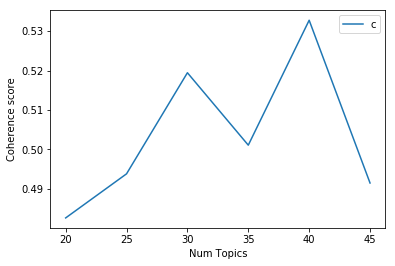

In [18]:
# Show graph
limit=50; start=20; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 20  has Coherence Value of 0.4827
Num Topics = 25  has Coherence Value of 0.4938
Num Topics = 30  has Coherence Value of 0.5194
Num Topics = 35  has Coherence Value of 0.5011
Num Topics = 40  has Coherence Value of 0.5327
Num Topics = 45  has Coherence Value of 0.4915


Studying the graph of topic models we can see that 40 topics seems to give the highest coherence score from our range of topics chosen!  

# Comments:

As you can see from this simple example, the iterative process of finding a good general topic model becomes slightly more intuitive when visualising the topic distribution and using metrics such as coherence. Studying each topic and their top words can also give insights as to how to change the vocabulary for a better model and how to change the parameters in our train_lda function that define the representation of topics. 

The LDA model is an extremely useful tool for any topic modeling task, and it has a variety of functions including finding similarity between documents (for this you may add "from gensim import similarities" in the imports). For example, this can be used to generate a simple recommendation system for documents in any system.